In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

plt.style.use("ggplot")

In [2]:
pd.set_option("display.max_columns",None)
lead_df=pd.read_csv("Leads.csv")
lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [3]:
lead_df.shape

(9240, 37)

In [4]:
lead_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [5]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Data Cleaning

In [6]:
category_cols=lead_df.select_dtypes(include=['object']).columns
for col in category_cols[1:]:
    print(col)
    print('-'*20)
    print(lead_df[col].value_counts())
    print()


Lead Origin
--------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

Lead Source
--------------------
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Do Not Email
--------------------
No     8506
Yes     734
Name: Do Not Email, dtype: int64

Do Not Call
--------------------
No     9238
Yes       2
Name: Do Not 

In [7]:
#Replacing the 'Select' with NaN as the lead did not fill that column
lead_df=lead_df.replace('Select',np.nan)

In [8]:
#Checking for null values
round(lead_df.isnull().sum().sort_values(ascending=False)/len(lead_df)*100,2)

#lead_df.drop(lead_df.loc[:,list(round(lead_df.isnull().sum()/lead_df.shape[0], 2)>0.70)].columns, 1)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [9]:
#Dropping columns that have null values greater than 70%
lead_df.drop(lead_df.loc[:,round(lead_df.isnull().sum()/len(lead_df),2)>.70].columns,axis=1,inplace=True)
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [10]:
round(lead_df.isnull().sum().sort_values(ascending=False)/len(lead_df)*100,2)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me 

In [11]:
#Many columns have single category or the other category is very very low.So dropping that rows.
cols_to_drop=['Do Not Call','What matters most to you in choosing a course','Search','Magazine','Newspaper Article',
               'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
              'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
               'I agree to pay the amount through cheque']
lead_df.drop(cols_to_drop,axis=1,inplace=True)

lead_df.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

#last_activity and last_notable_activity are highly correlated. One of them should be dropped to avoid multi-collinearity.
lead_df.drop(['Last Activity'],axis=1,inplace=True)

lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Country                                 6779 non-null   object 
 8   Specialization                          5860 non-null   object 
 9   What is your current occupation         6550 non-null   object 
 10  Tags                                    5887 non-null   obje

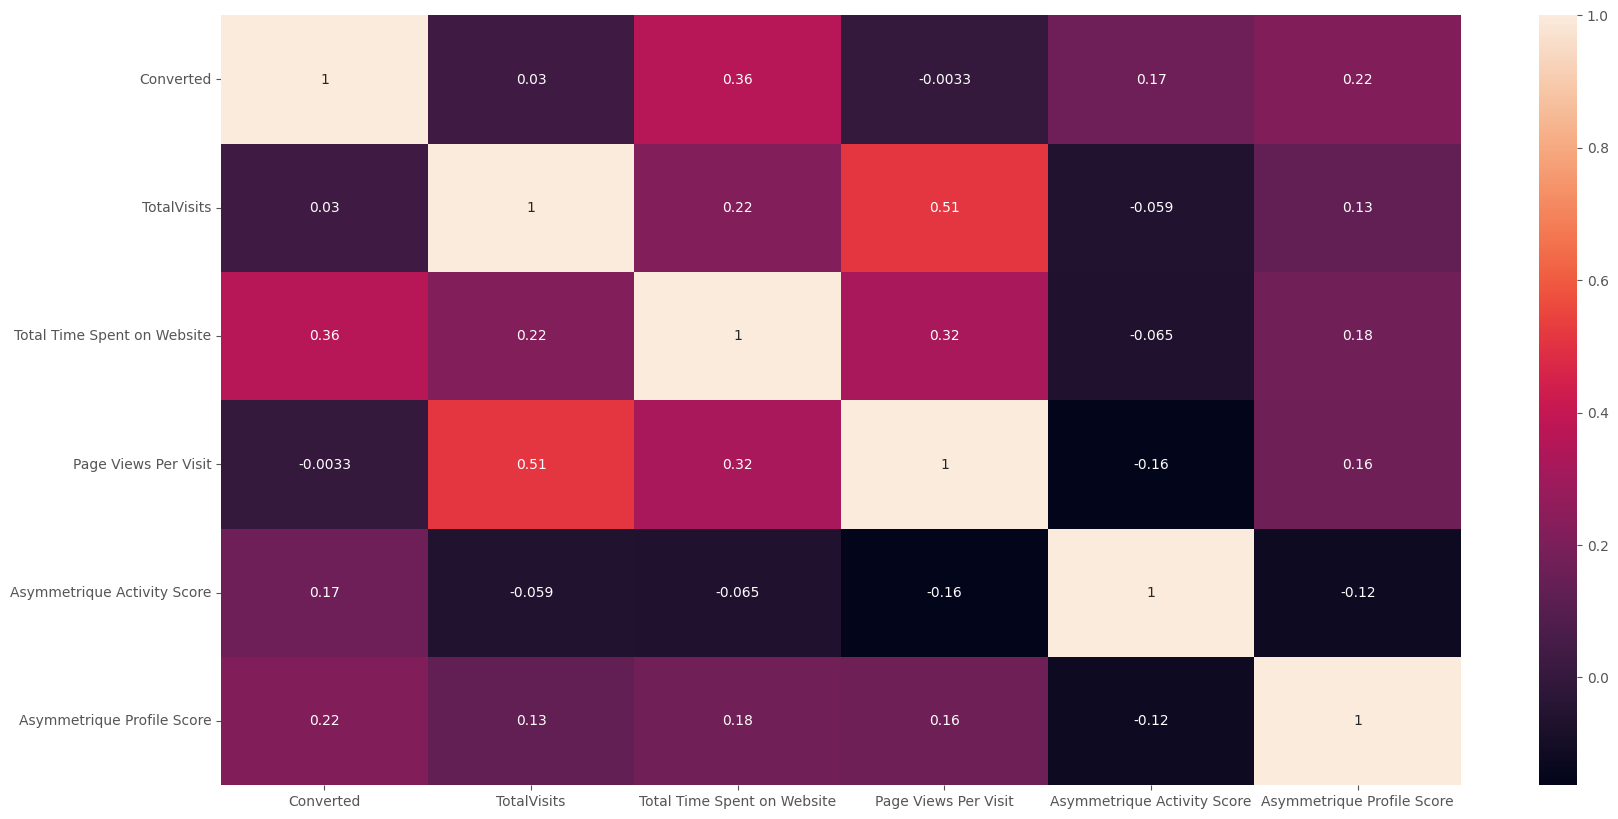

In [12]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(lead_df.corr(),annot = True)
plt.show()

### Data Preparation and Imputing missing values

In [13]:
lead_df['Lead Quality'].value_counts(dropna=False)

NaN                  4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [14]:
#We can impute the missing values NaN with 'Not Sure' 
lead_df['Lead Quality'].fillna('Not Sure',inplace=True)
lead_df['Lead Quality'].value_counts(dropna=False)

Not Sure             5859
Might be             1560
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [15]:
#As columns 'Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'
#has more than 45% null values ,we are dropping that columns
lead_df.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],axis=1,inplace=True)

In [16]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Country                                 6779 non-null   object 
 8   Specialization                          5860 non-null   object 
 9   What is your current occupation         6550 non-null   object 
 10  Tags                                    5887 non-null   obje

In [17]:
round(lead_df.isnull().sum().sort_values(ascending=False)/len(lead_df)*100,2)

City                                      39.71
Specialization                            36.58
Tags                                      36.29
What is your current occupation           29.11
Country                                   26.63
TotalVisits                                1.48
Page Views Per Visit                       1.48
Lead Source                                0.39
Lead Origin                                0.00
Do Not Email                               0.00
Converted                                  0.00
Total Time Spent on Website                0.00
Lead Quality                               0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [18]:
lead_df['City'].value_counts(normalize=True)

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

In [19]:
#Dropping columns 'City','Tags' as it has missing values >35%
lead_df.drop(['City','Tags'],axis=1,inplace=True)
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Country                                 6779 non-null   object 
 8   Specialization                          5860 non-null   object 
 9   What is your current occupation         6550 non-null   object 
 10  Lead Quality                            9240 non-null   obje

In [20]:
#Null values in the 'Specialization' column can be replaced by 'UnKnown'
lead_df['Specialization']=lead_df['Specialization'].replace(np.nan,'UnKnown')

In [21]:
lead_df['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [22]:
#Since 85% of the data is unemployed ,we can impute the null values with 'Unemployed'
lead_df['What is your current occupation']=lead_df['What is your current occupation'].replace(np.nan,'Unemployed')

In [23]:
lead_df['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

In [24]:
# More than 95% data is of "India" and hence it is safer to impute NULLS with this value
lead_df['Country'] = lead_df['Country'].replace(np.nan, 'India')

In [25]:
round(lead_df.isnull().sum().sort_values(ascending=False)/len(lead_df)*100,2)

TotalVisits                               1.48
Page Views Per Visit                      1.48
Lead Source                               0.39
Lead Origin                               0.00
Do Not Email                              0.00
Converted                                 0.00
Total Time Spent on Website               0.00
Country                                   0.00
Specialization                            0.00
What is your current occupation           0.00
Lead Quality                              0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [26]:
# Remaining NULL values are less than 2% and hence these rows can be directly dropped
lead_df.dropna(inplace=True)

In [27]:
round(lead_df.isnull().sum().sort_values(ascending=False)/len(lead_df)*100,2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
Lead Quality                              0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [28]:


# Do not Email col.
lead_df['Do Not Email'] = lead_df['Do Not Email'].map({'Yes':1, 'No':0})
lead_df['A free copy of Mastering The Interview'] = lead_df['A free copy of Mastering The Interview'].map({'Yes':1, 'No':0})

In [29]:
# Cleaning "Lead Source" column
df1 = lead_df["Lead Source"].value_counts()

# Values with frequency less than 30 are classified under "others"
lead_df['Lead Source'] = lead_df["Lead Source"].replace(df1[df1 < 30].index, "others")
lead_df["Lead Source"].value_counts()


Google              2868
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
others                28
Name: Lead Source, dtype: int64

In [30]:
df1 = lead_df["Country"].value_counts()

# Values with frequency less than 30 are classified under "other Countries"
lead_df['Country'] = lead_df["Country"].replace(df1[df1 < 30].index, "other Countries")

df1 = lead_df["Last Notable Activity"].value_counts()

# Values with frequency less than 30 are classified under "other Countries"
lead_df['Last Notable Activity'] = lead_df["Last Notable Activity"].replace(df1[df1 < 30].index, "others")


In [31]:
category_cols=lead_df.select_dtypes(include=['object']).columns
for col in category_cols:
    print(col)
    print('-'*20)
    print(lead_df[col].value_counts())
    print()

Lead Origin
--------------------
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

Lead Source
--------------------
Google              2868
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
others                28
Name: Lead Source, dtype: int64

Country
--------------------
India                   8787
other Countries          165
United States             69
United Arab Emirates      53
Name: Country, dtype: int64

Specialization
--------------------
UnKnown                              3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chai

In [32]:
lead_df.rename(columns = {'What is your current occupation':'Occupation'}, inplace = True)

In [33]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   int64  
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Country                                 9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   Occupation                              9074 non-null   object 
 10  Lead Quality                            9074 non-null   obje

### Exploratory Data Analysis

In [34]:
#Analysing target variable
lead_df["Converted"].value_counts(normalize=True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

There is no much data imbalance is there

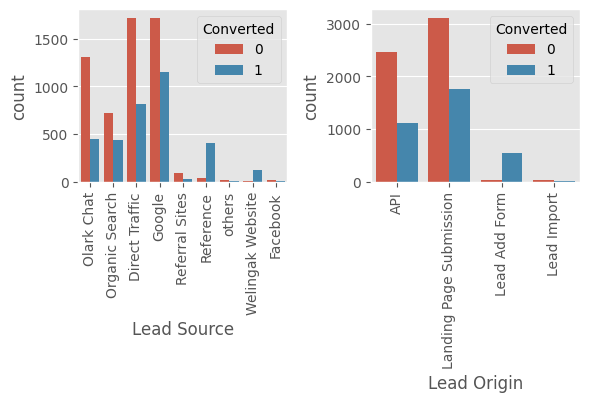

In [35]:
fig=plt.subplots(figsize=(6, 6))
plt.subplot(2,2,1)
sns.countplot(x="Lead Source", hue="Converted", data= lead_df)
plt.xticks(rotation='vertical')

plt.subplot(2,2,2)
sns.countplot(x="Lead Origin", hue="Converted", data= lead_df)
plt.xticks(rotation='vertical')
plt.tight_layout()




The main Lead Source is 'Google' as per the plot
In the case of lead origin , the count is higher for 'Landing Page Submission'.

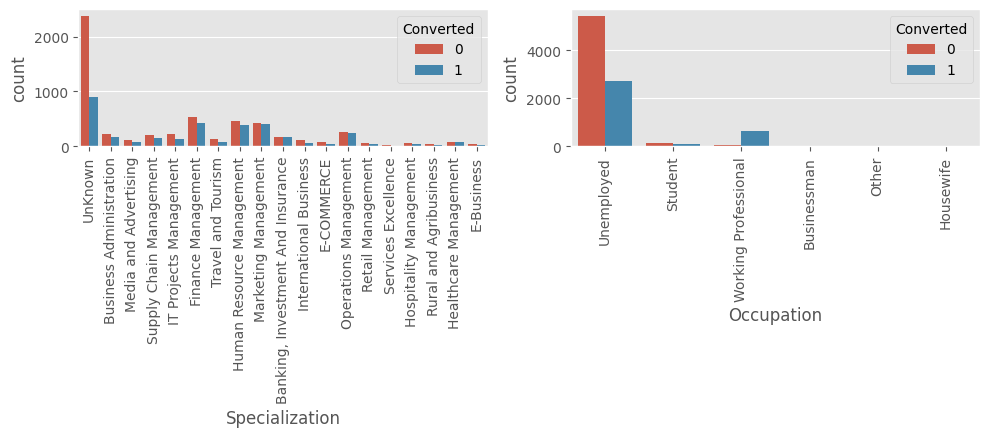

In [36]:
fig=plt.subplots(figsize=(10, 6))

for i, feature in enumerate(["Specialization", "Occupation"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(x=feature, hue="Converted", data=lead_df)
    plt.xticks( rotation='vertical')
    plt.tight_layout()

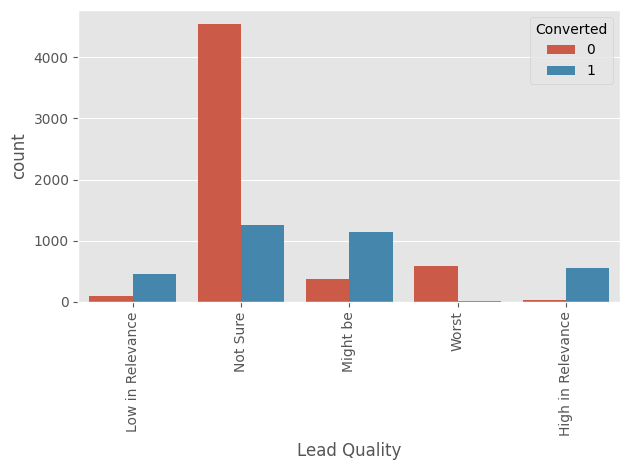

In [37]:
sns.countplot(x="Lead Quality", hue="Converted", data= lead_df)
plt.xticks(rotation='vertical')
plt.tight_layout()

### Outlier  Checking

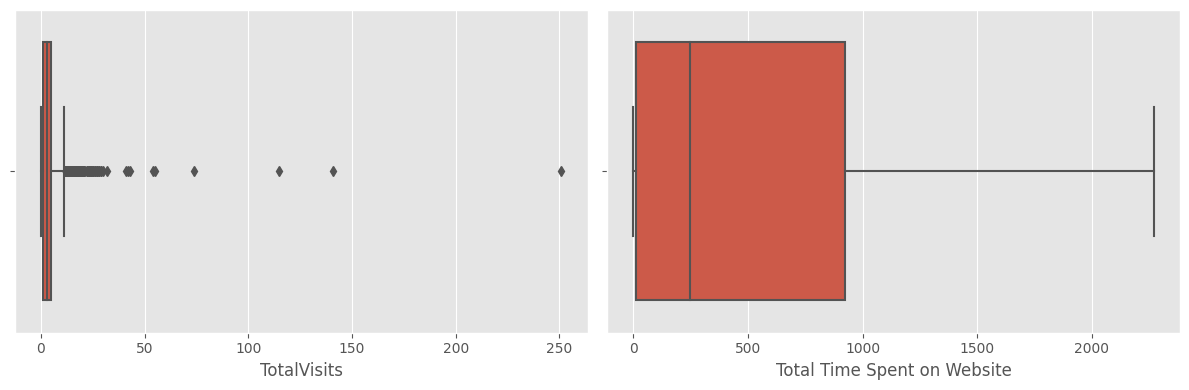

In [38]:
num_cols=["TotalVisits", "Total Time Spent on Website"]
plt.figure(figsize=(12, 4))
plt.subplot(121)
sns.boxplot(data=lead_df, x=num_cols[0])

plt.subplot(122)
sns.boxplot(data=lead_df, x=num_cols[1])
plt.tight_layout()
  

 There are some outliers in the 'TotalVisits' column and we can cap this  to 95 percetile

In [39]:
df1 = lead_df["TotalVisits"].quantile(0.95)
lead_df["TotalVisits"][lead_df["TotalVisits"] >= df1] = df1

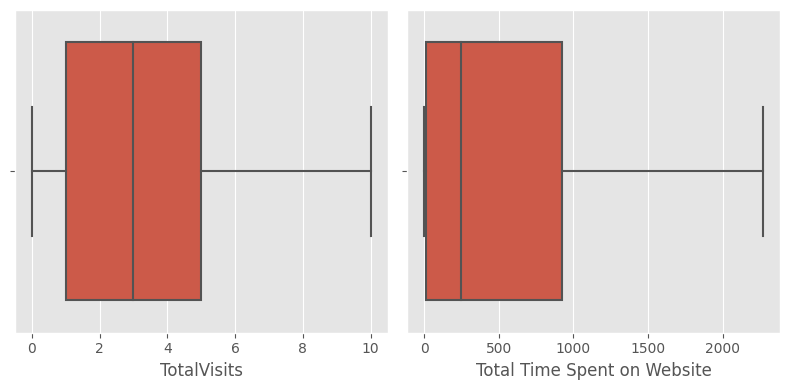

In [40]:
num_cols=["TotalVisits", "Total Time Spent on Website"]
plt.figure(figsize=(8, 4))
plt.subplot(121)
sns.boxplot(data=lead_df, x=num_cols[0])

plt.subplot(122)
sns.boxplot(data=lead_df, x=num_cols[1])
plt.tight_layout()

In [41]:
num_df = lead_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
num_df.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9074.000000                  9074.000000           9074.000000
mean      3.191867                   482.887481              2.370151
std       2.780618                   545.256560              2.160871
min       0.000000                     0.000000              0.000000
25%       1.000000                    11.000000              1.000000
50%       3.000000                   246.000000              2.000000
75%       5.000000                   922.750000              3.200000
90%       7.000000                  1373.000000              5.000000
99%      10.000000                  1839.000000              9.000000
max      10.000000                  2272.000000             55.000000

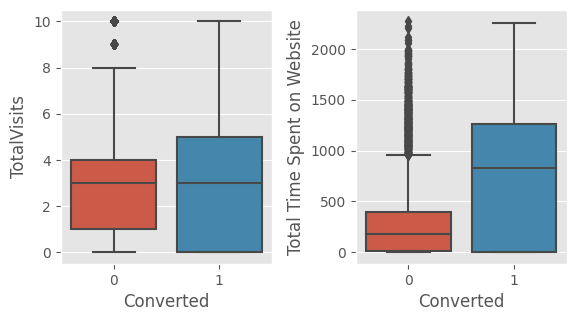

In [42]:
fig=plt.subplots(figsize=(6, 6))

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(y = feature, x = 'Converted', data = lead_df)
    plt.tight_layout()

### Creating Dummy Variables 

In [43]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   int64  
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Country                                 9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   Occupation                              9074 non-null   object 
 10  Lead Quality                            9074 non-null   obje

In [44]:
dummy1 = pd.get_dummies(lead_df[['Lead Origin', 'Lead Source','Occupation',
                              'Country','Lead Quality','Last Notable Activity']], drop_first=True)
d = pd.get_dummies(lead_df['Specialization'], prefix='Specialization')
d1 = d.drop(['Specialization_UnKnown'], 1)
lead_df = lead_df.drop(['Lead Origin', 'Lead Source','Occupation',
                              'Country','Lead Quality','Last Notable Activity','Specialization'], axis=1)
lead_df = pd.concat([lead_df, dummy1,d1], axis=1)
lead_df.head()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
0             0          0          0.0                            0   
1             0          0          5.0                          674   
2             0          1          2.0                         1532   
3             0          0          1.0                          305   
4             0          1          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Reference  \
0                       1                           0                      0   
1                       0                           1                      0   
2                       0                           0                      0   
3                       0                           0                      0   
4                       0                           0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Lead Source_others  Occupation_Housewife  Occupation_Other  \
0                   0                     0                 0   
1                   0                     0                 0   
2                   0                     0                 0   
3                   0                     0                 0   
4                   0                     0                 0   

   Occupation_Student  Occupation_Unemployed  Occupation_Working Professional  \
0                   0                      1                                0   
1                   0                      1                                0   
2                   1                      0                                0   
3                   0                      1                                0   
4                   0                      1                                0   

   Country_United Arab Emirates  Country_United States  \
0                             0                      0   
1                             0                      0   
2                             0                      0   
3                             0                      0   
4                             0                      0   

   Country_other Countries  Lead Quality_Low in Relevance  \
0                        0                              1   
1                        0                              0   
2                        0                       

In [45]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 56 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      9074 non-null   int64  
 1   Converted                                         9074 non-null   int64  
 2   TotalVisits                                       9074 non-null   float64
 3   Total Time Spent on Website                       9074 non-null   int64  
 4   Page Views Per Visit                              9074 non-null   float64
 5   A free copy of Mastering The Interview            9074 non-null   int64  
 6   Lead Origin_Landing Page Submission               9074 non-null   uint8  
 7   Lead Origin_Lead Add Form                         9074 non-null   uint8  
 8   Lead Origin_Lead Import                           9074 non-null   uint8  
 9   Lead Source_Faceboo

## Test- Train Split 

In [46]:
X=lead_df.drop('Converted',axis=1)
y=lead_df['Converted']
X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             0          2.0                         1532   
3             0          1.0                          305   
4             0          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Reference  \
0                       1                           0                      0   
1                       0                           1                      0   
2                       0                           0                      0   
3                       0                           0                      0   
4                       0                           0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Lead Source_others  Occupation_Housewife  Occupation_Other  \
0                   0                     0                 0   
1                   0                     0                 0   
2                   0                     0                 0   
3                   0                     0                 0   
4                   0                     0                 0   

   Occupation_Student  Occupation_Unemployed  Occupation_Working Professional  \
0                   0                      1                                0   
1                   0                      1                                0   
2                   1                      0                                0   
3                   0                      1                                0   
4                   0                      1                                0   

   Country_United Arab Emirates  Country_United States  \
0                             0                      0   
1                             0                      0   
2                             0                      0   
3                             0                      0   
4                             0                      0   

   Country_other Countries  Lead Quality_Low in Relevance  \
0                        0                              1   
1                        0                              0   
2                        0                              0   
3                        0                            

In [47]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [48]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [49]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
3009             0    -0.432779                    -0.160255   
1012             1    -0.432779                    -0.540048   
9226             0    -1.150329                    -0.888650   
4750             0    -0.432779                     1.643304   
7987             0     0.643547                     2.017593   

      Page Views Per Visit  A free copy of Mastering The Interview  \
3009             -0.179666                                       1   
1012             -0.179666                                       0   
9226             -1.132538                                       0   
4750             -0.179666                                       0   
7987              0.058552                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3009                                    1                          0   
1012                                    1                          0   
9226                                    0                          0   
4750                                    1                          0   
7987                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
3009                        0                     0                   0   
1012                        0                     0                   0   
9226                        0                     0                   0   
4750                        0                     0                   0   
7987                        0                     0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  \
3009                       0                           0   
1012                       0                           0   
9226                       1                           0   
4750                       0                           0   
7987                       0                           0   

      Lead Source_Reference  Lead Source_Referral Sites  \
3009                      0                           0   
1012                      0                           0   
9226                      0                           0   
4750                      0                           0   
7987                      0                           0   

      Lead Source_Welingak Website  Lead Source_others  Occupation_Housewife  \
3009                             0                   0                     0   
1012                             0                   0                     0   
9226                             0                   0                     0   
4750                             0                   0                     0   
7987                             0                   0                     0   

      Occupation_Other  Occupation_Student  Occupation_Unemployed  \
3009                 0                   0                      1   
1012                 0                   0                      0   
9226                 0                   0                      1   
4750                 0                   0                      1   
7987                 0                   0                      1   

      Occupation_Working Professional  Country_United Arab Emirates  \
3009                                0                             0   
1012                                1                             0   
9226                                0                             0   
4750                                0                             0   
7987                                0                             0   

      Country_United States  Country_other Countries  \
3009                      0                        0   
1012                      0                        0   
9226                      0                        0   
4750                      0                        0 

In [50]:
#Checking the Conversion Rate

print("Conversion rate is ", (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100)

Conversion rate is  37.85541106458012


The conversion rate is almost 38%

## Looking at correlation

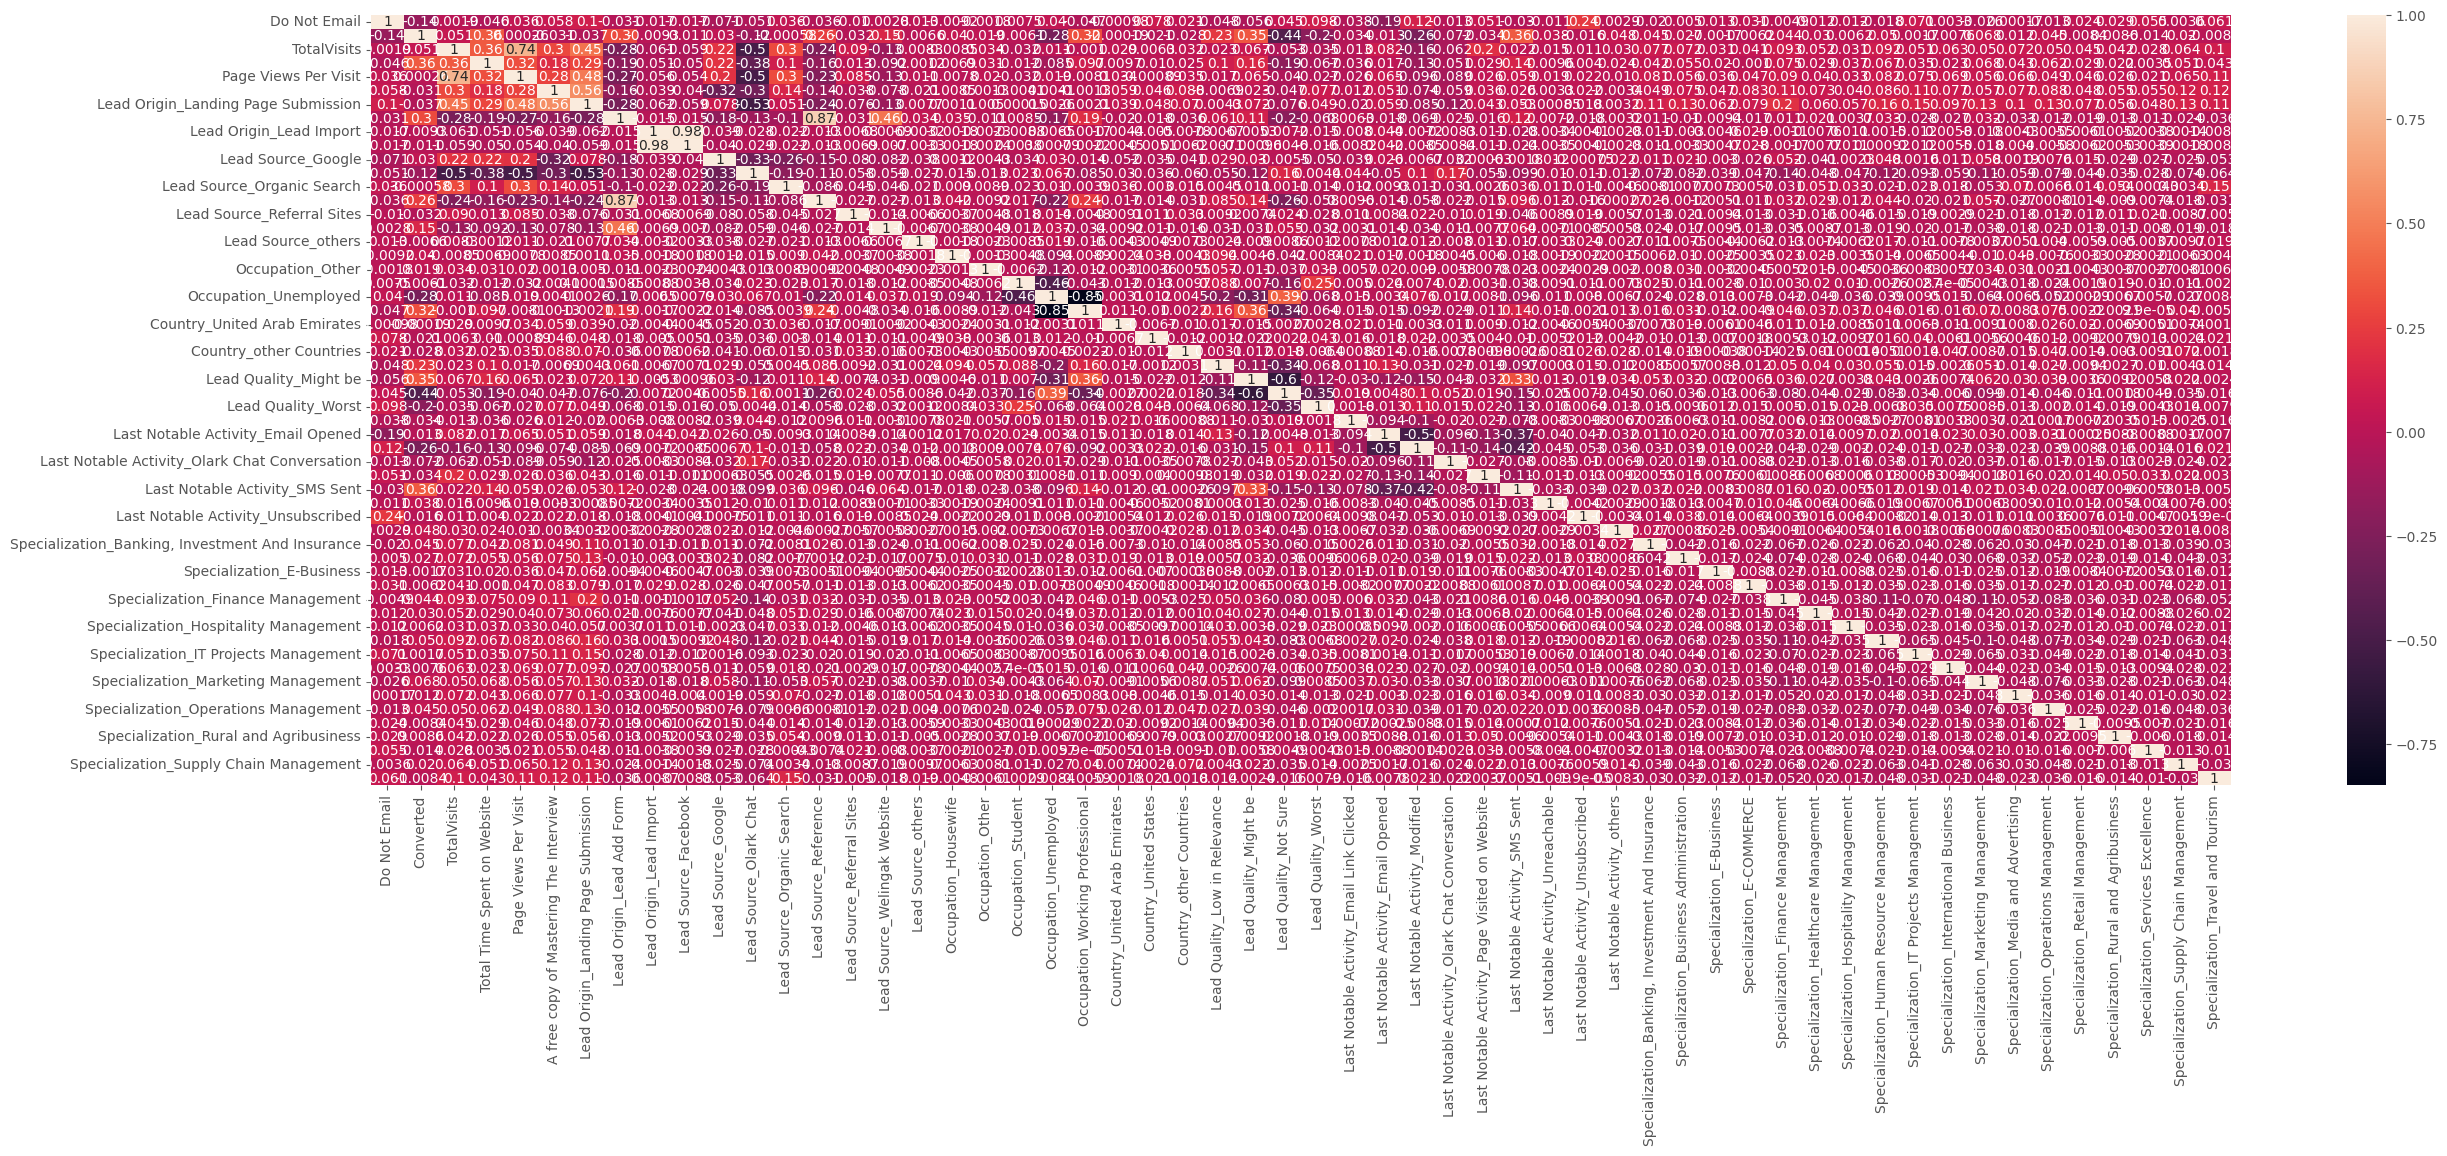

In [51]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,10))        # Size of the figure
sns.heatmap(lead_df.corr(),annot = True)
plt.show()

In [52]:
# Correlation between different numerical variables 
corr1 = lead_df.corr()

# Unstacking the correlation matrix and sorting it to find out top correlations
corr_unstacked = corr1.unstack().sort_values(kind="quicksort")
corr1.where(np.triu(np.ones(corr1.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Import                 Lead Source_Facebook                   0.983684
Lead Origin_Lead Add Form               Lead Source_Reference                  0.866191
TotalVisits                             Page Views Per Visit                   0.737996
A free copy of Mastering The Interview  Lead Origin_Landing Page Submission    0.564863
Page Views Per Visit                    Lead Origin_Landing Page Submission    0.484119
Lead Origin_Lead Add Form               Lead Source_Welingak Website           0.459142
TotalVisits                             Lead Origin_Landing Page Submission    0.454350
Occupation_Unemployed                   Lead Quality_Not Sure                  0.390708
TotalVisits                             Total Time Spent on Website            0.361207
Converted                               Last Notable Activity_SMS Sent         0.360233
dtype: float64

In [53]:
# Dropping variables with high multi-collinearity
X_test = X_test.drop(['Lead Source_Facebook', 'Lead Origin_Lead Add Form'], axis=1)
X_train = X_train.drop(['Lead Source_Facebook', 'Lead Origin_Lead Add Form'], axis=1)

In [54]:
# Top 5 features correlated with target variable
lead_df.corr()['Converted'].abs().sort_values(ascending=False).head(6)[1:]

Lead Quality_Not Sure              0.443920
Last Notable Activity_SMS Sent     0.360233
Total Time Spent on Website        0.359261
Lead Quality_Might be              0.349936
Occupation_Working Professional    0.316246
Name: Converted, dtype: float64

## Model Building

In [55]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6297
Model Family:                Binomial   Df Model:                           53
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2106.4
Date:                Sun, 16 Apr 2023   Deviance:                       4212.9
Time:                        13:27:57   Pearson chi2:                 6.38e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4881
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                4.1084      1.371      2.997      0.003       1.422       6.795
Do Not Email                                        -1.3869      0.229     -6.047      0.000      -1.837      -0.937
TotalVisits                                          0.2526      0.064      3.946      0.000       0.127       0.378
Total Time Spent on Website                          1.1167      0.047     23.955      0.000       1.025       1.208
Page Views Per Visit                                -0.2400      0.067     -3.568      0.000      -0.372      -0.108
A free copy of Mastering The Interview              -0.0719      0.128     -0.562      0.574      -0.322       0.179
Lead Origin_Landing Page Submission                 -0.6371      0.158     -4.040      0.000      -0.946      -0.328
Lead Origin_Lead Import                              0.8917      0.595      1.500      0.134      -0.274       2.057
Lead Source_Google                                   0.2067      0.132      1.560      0.119      -0.053       0.466
Lead Source_Olark Chat                               1.2749      0.181      7.043      0.000       0.920       1.630
Lead Source_Organic Search                          -0.0432      0.153     -0.283      0.777      -0.342       0.256
Lead Source_Reference                                2.5427      0.306      8.300      0.000       1.942       3.143
Lead Source_Referral Sites                          -0.4592      0.401     -1.146      0.252      -1.245       0.326
Lead Source_Welingak Website                         6.4921      0.747      8.696      0.000       5.029       7.955
Lead Source_others                                   0.8556      0.603      1.420      0.156      -0.326       2.037
Occupation_Housewife                                19.6887    1.6e+04      0.001      0.999   -3.13e+04    3.14e+04
Occupation_Other                                    -0.7203      1.502     -0.480      0.631      -3.664       2.223
Occupation_Student                                  -1.0698      1.251     -0.855      0.392      -3.521       1.382
Occupation_Unemployed                               -1.6490      1.204     -1.370      0.171      -4.008       0.710
Occupation_Working Professional                      0.1662      1.223      0.136      0.892      -2.231       2.563
Country_United Arab Emirates                         0.6384      0.484      1.320      0.187      -0.309       1.586
Country_United States                                0.6320      0.518      1.220      0.222      -0.383       1.647
Country_other Countries                             -0.5049      0.315     -1.600      0.110      -1.123       0.113
Lead Quality_Low in Relevance            

## Feature selection using RFE 

In [56]:
logreg = LogisticRegression()

In [57]:
rfe = RFE(logreg,n_features_to_select= 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [58]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False,  True,
       False,  True, False,  True, False, False, False, False, False,
        True, False, False, False,  True,  True,  True,  True, False,
       False, False, False, False,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [59]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 22),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 21),
 ('A free copy of Mastering The Interview', False, 32),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 25),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 33),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 6),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_others', False, 8),
 ('Occupation_Housewife', False, 11),
 ('Occupation_Other', False, 31),
 ('Occupation_Student', False, 4),
 ('Occupation_Unemployed', False, 3),
 ('Occupation_Working Professional', True, 1),
 ('Country_United Arab Emirates', False, 13),
 ('Country_United States', False, 12),
 ('Country_other Countries', False, 9),
 ('Lead Quality_Low in Relevance', True, 1),
 ('Lead Quality_Might be', True, 1),
 ('Lead Quality_Not Sure', True, 1),
 (

In [60]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Occupation_Working Professional', 'Lead Quality_Low in Relevance',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed', 'Last Notable Activity_others'],
      dtype='object')

In [61]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_others', 'Occupation_Housewife', 'Occupation_Other',
       'Occupation_Student', 'Occupation_Unemployed',
       'Country_United Arab Emirates', 'Country_United States',
       'Country_other Countries', 'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
     

### Assessing the model using statsmodel

In [62]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2173.8
Date:                Sun, 16 Apr 2023   Deviance:                       4347.5
Time:                        14:39:14   Pearson chi2:                 6.42e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4772
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  1.8740      0.239      7.842      0.000       1.406       2.342
Do Not Email                          -1.5467      0.205     -7.546      0.000      -1.948      -1.145
Total Time Spent on Website            1.1168      0.045     24.555      0.000       1.028       1.206
Lead Origin_Lead Import                1.2783      0.571      2.240      0.025       0.160       2.397
Lead Source_Olark Chat                 1.3483      0.113     11.943      0.000       1.127       1.570
Lead Source_Reference                  2.8465      0.259     10.978      0.000       2.338       3.355
Lead Source_Welingak Website           6.6030      0.732      9.026      0.000       5.169       8.037
Occupation_Working Professional        1.8118      0.218      8.315      0.000       1.385       2.239
Lead Quality_Low in Relevance         -1.3604      0.281     -4.835      0.000      -1.912      -0.809
Lead Quality_Might be                 -2.3138      0.255     -9.081      0.000      -2.813      -1.814
Lead Quality_Not Sure                 -4.0796      0.244    -16.693      0.000      -4.559      -3.601
Lead Quality_Worst                    -6.1986      0.440    -14.088      0.000      -7.061      -5.336
Last Notable Activity_SMS Sent         1.7119      0.088     19.414      0.000       1.539       1.885
Last Notable Activity_Unreachable      1.8154      0.552      3.286      0.001       0.733       2.898
Last Notable Activity_Unsubscribed     1.3494      0.640      2.110      0.035       0.096       2.603
Last Notable Activity_others           2.2780      0.797      2.856      0.004       0.715       3.841
======================================================================================================
"""

In [63]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.084361
1012    0.072860
9226    0.135908
4750    0.792754
7987    0.511922
1281    0.908543
2880    0.039552
4971    0.836521
7536    0.992858
1248    0.467404
dtype: float64

In [64]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08436127, 0.07285957, 0.13590848, 0.79275406, 0.51192211,
       0.90854288, 0.0395519 , 0.83652147, 0.99285799, 0.46740404])

#### Creating a dataframe with the true convertion status and the predicted probabilities

In [67]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Ld_ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Ld_ID
0          0        0.084361   3009
1          0        0.072860   1012
2          0        0.135908   9226
3          1        0.792754   4750
4          1        0.511922   7987

#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [68]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob  Ld_ID  predicted
0          0        0.084361   3009          0
1          0        0.072860   1012          0
2          0        0.135908   9226          0
3          1        0.792754   4750          1
4          1        0.511922   7987          1

In [69]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3564  341]
 [ 633 1813]]


In [ ]:
# Predicted     not_Converted    Converted
# Actual
# not_Converted        3564      341
# Converted            633      1813

In [70]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8466383246732798


### Checking VIFs 

In [71]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8                Lead Quality_Might be  1.60
11      Last Notable Activity_SMS Sent  1.54
9                Lead Quality_Not Sure  1.52
3               Lead Source_Olark Chat  1.49
6      Occupation_Working Professional  1.35
1          Total Time Spent on Website  1.33
4                Lead Source_Reference  1.23
0                         Do Not Email  1.17
7        Lead Quality_Low in Relevance  1.11
13  Last Notable Activity_Unsubscribed  1.06
5         Lead Source_Welingak Website  1.05
10                  Lead Quality_Worst  1.05
2              Lead Origin_Lead Import  1.01
14        Last Notable Activity_others  1.01
12   Last Notable Activity_Unreachable  1.00

All variables have a good value of VIF < 2